<a href="https://colab.research.google.com/github/PavanTej219/FMML_Project_and_Labs/blob/main/AIML_Module_4_Lab_2_Introduction_to_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Student Training Program on AIML**
# Module 4: Perceptron and Gradient Descent
## Lab 2: Introduction to Gradient Descent

Gradient descent is a very important algorithm to understand, as it underpins many of the more advanced algorithms used in Machine Learning and Deep Learning.

A brief overview of the algorithm is


*   start with a random initialization of the solution.
*   incrementally change the solution by moving in the direction of negative gradient of the objective function.
*   repeat the previous step until some convergence criteria is met.

The key equation for change in weight is:
$$w^{k+1} \leftarrow w^k - \eta \Delta J$$



In [1]:
# Importing the required libraries

import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(42)
np.random.seed(42)

We can start be choosing coefficients for a second degree polynomial equation $(a x^2 + bx + c)$ that will distribute the data we will try to model.

Let's define some random x data (inputs) we hope to predict y (outputs) of.

In [2]:
def eval_2nd_degree(coeffs, x):
    """
    Function to return the output of evaluating a second degree polynomial,
    given a specific x value.

    Args:
        coeffs: List containing the coefficients a, b, and c for the polynomial.
        x: The input x value to the polynomial.

    Returns:
        y: The corresponding output y value for the second degree polynomial.

    """

    a = coeffs[0] * (x * x)
    b = coeffs[1] * x
    c = coeffs[2]
    y = a + b + c
    return y

hundred_xs = np.random.uniform(-10, 10, 100)
coeffs = [1, 0, 0]

xs = []
ys = []
for x in hundred_xs:
    y  = eval_2nd_degree(coeffs, x)
    xs.append(x)
    ys.append(y)

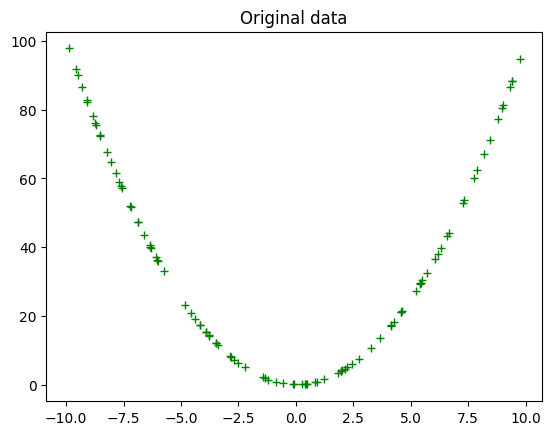

In [3]:
plt.plot(xs, ys, 'g+')
plt.title('Original data')
plt.show()

This is good, but we could improve on this by making things more realistic. You can add noise or **jitter** to the values so they can resemble real-world data.


In [4]:
def eval_2nd_degree_jitter(coeffs, x, j):
    """
    Function to return the noisy output of evaluating a second degree polynomial,
    given a specific x value. Output values can be within [y − j, y + j].

    Args:
        coeffs: List containing the coefficients a, b, and c for the polynomial.
        x: The input x value to the polynomial.
        j: Jitter parameter, to introduce noise to output y.

    Returns:
        y: The corresponding jittered output y value for the second degree polynomial.

    """

    a = coeffs[0] * (x * x)
    b = coeffs[1] * x
    c = coeffs[2]
    y = a + b + c

    interval = [y - j, y + j]
    interval_min = interval[0]
    interval_max = interval[1]
    jit_val = random.random() * interval_max      # Generate a random number in range 0 to interval max

    while interval_min > jit_val:                 # While the random jitter value is less than the interval min,
        jit_val = random.random() * interval_max  # it is not in the right range. Re-roll the generator until it
                                                  # give a number greater than the interval min.

    return jit_val

xs = []
ys = []
for x in hundred_xs:
    y  = eval_2nd_degree_jitter(coeffs, x, 0.1)
    xs.append(x)
    ys.append(y)


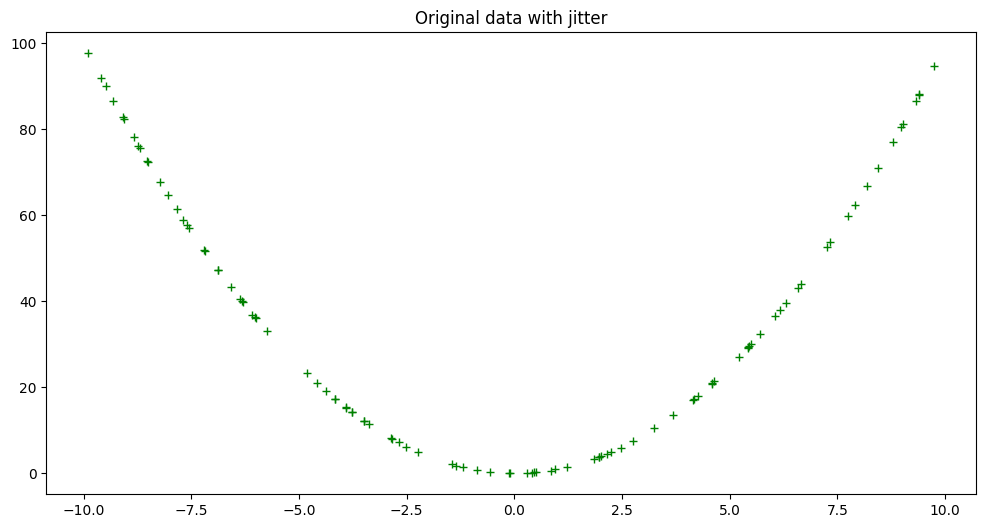

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+')
plt.title('Original data with jitter')
plt.show()

We will now build our predictive model, and optimize it with gradient descent and we will try to get as close to these values as possible.

To get a quantifiable measure of how incorrect it is, we calculate the Mean Squared Error loss for the model. This is the mean value of the sum of the squared differences between the actual and predicted outputs.

$$ E = \frac{1}{n} \sum_{i=0}^n (y_i - \bar{y_i})^2 $$

In [6]:
def loss_mse(ys, y_bar):
    """
    Calculates MSE loss.

    Args:
        ys: training data labels
        y_bar: prediction labels

    Returns: Calculated MSE loss.
    """

    return sum((ys - y_bar) * (ys - y_bar)) / len(ys)

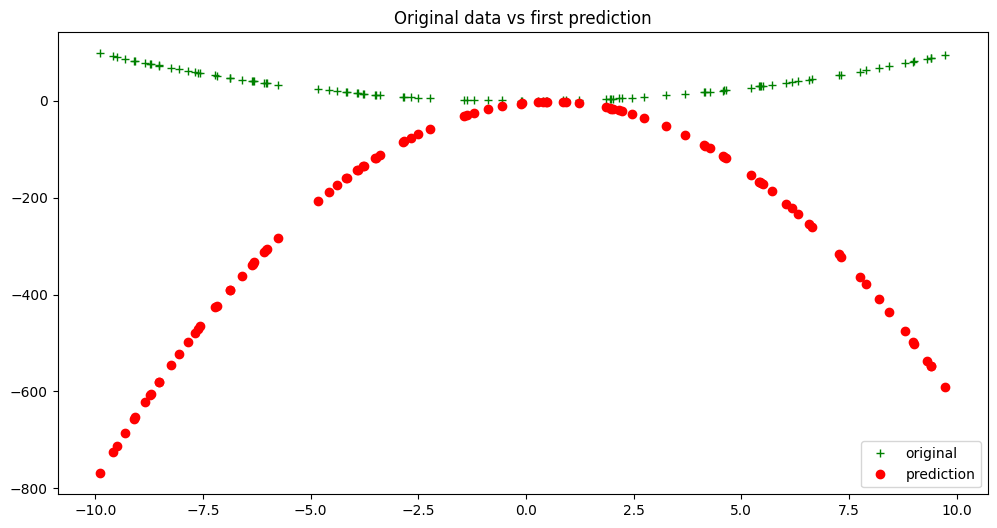

In [7]:
rand_coeffs = (random.randrange(-10, 10), random.randrange(-10, 10), random.randrange(-10, 10))
y_bar = eval_2nd_degree(rand_coeffs, hundred_xs)
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, y_bar, 'ro', label = 'prediction')
plt.title('Original data vs first prediction')
plt.legend(loc="lower right")
plt.show()

In [8]:
initial_model_loss = loss_mse(ys, y_bar)
initial_model_loss

np.float64(146807.86204726336)

We can see that the loss is quite a large number. Let’s now see if we can improve on this fairly high loss metric by optimizing the model with gradient descent.

We wish to improve our model. Therefore we want to alter its coefficients $a$, $b$ and $c$ to decrease the error. Therefore we require knowledge about how each coefficient affects the error. This is achieved by calculating the partial derivative of the loss function with respect to **each** of the individual coefficients.

In [9]:
def calc_gradient_2nd_poly(rand_coeffs, hundred_xs, ys):
    """
    calculates the gradient for a second degree polynomial.

    Args:
        coeffs: a,b and c, for a 2nd degree polynomial [ y = ax^2 + bx + c ]
        inputs_x: x input datapoints
        outputs_y: actual y output points

    Returns: Calculated gradients for the 2nd degree polynomial, as a tuple of its parts for a,b,c respectively.

    """

    a_s = []
    b_s = []
    c_s = []

    y_bars = eval_2nd_degree(rand_coeffs, hundred_xs)

    for x, y, y_bar in list(zip(hundred_xs, ys, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)
        x_squared = x ** 2
        partial_a = x_squared * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x * (y - y_bar)
        b_s.append(partial_b)
        partial_c = (y - y_bar)
        c_s.append(partial_c)

    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)

    return (gradient_a, gradient_b, gradient_c)   # return calculated gradients as a a tuple of its 3 parts

In [10]:
calc_grad = calc_gradient_2nd_poly(rand_coeffs, hundred_xs, ys)

lr = 0.0001
a_new = rand_coeffs[0] - lr * calc_grad[0]
b_new = rand_coeffs[1] - lr * calc_grad[1]
c_new = rand_coeffs[2] - lr * calc_grad[2]

new_model_coeffs = (a_new, b_new, c_new)
print(f"New model coeffs: {new_model_coeffs}")

# update with these new coeffs:
new_y_bar = eval_2nd_degree(new_model_coeffs, hundred_xs)
updated_model_loss = loss_mse(ys, new_y_bar)

print(f"Now have smaller model loss: {updated_model_loss} vs {initial_model_loss}")

New model coeffs: (np.float64(-3.4872074852403587), np.float64(7.879149056895183), np.float64(-4.941405407033594))
Now have smaller model loss: 49608.172144854274 vs 146807.86204726336


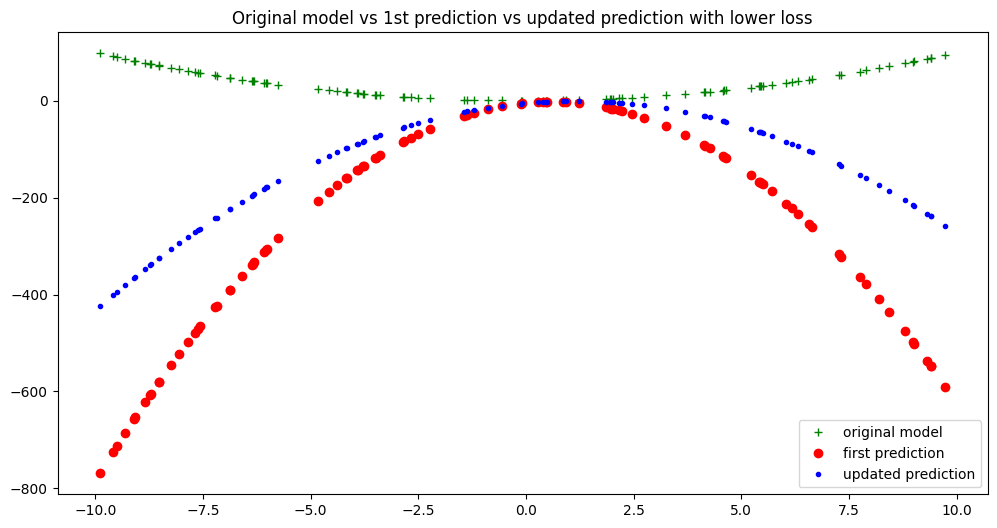

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label = 'original model')
plt.plot(xs, y_bar, 'ro', label = 'first prediction')
plt.plot(xs, new_y_bar, 'b.', label = 'updated prediction')
plt.title('Original model vs 1st prediction vs updated prediction with lower loss')
plt.legend(loc="lower right")
plt.show()

We’re almost ready. The last step will be to perform gradient descent iteratively over a number of epochs (cycles or iterations.) With every epoch we hope to see an improvement in the form of lowered loss, and better model-fitting to the original data.

In [12]:
def calc_gradient_2nd_poly_for_GD(coeffs, inputs_x, outputs_y, lr):
    """
    calculates the gradient for a second degree polynomial.

    Args:
        coeffs: a,b and c, for a 2nd degree polynomial [ y = ax^2 + bx + c ]
        inputs_x: x input datapoints
        outputs_y: actual y output points
        lr: learning rate

    Returns: Calculated gradients for the 2nd degree polynomial, as a tuple of its parts for a,b,c respectively.

    """
    a_s = []
    b_s = []
    c_s = []

    y_bars = eval_2nd_degree(coeffs, inputs_x)

    for x,y,y_bar in list(zip(inputs_x, outputs_y, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)
        x_squared = x ** 2
        partial_a = x_squared * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x * (y - y_bar)
        b_s.append(partial_b)
        partial_c = (y - y_bar)
        c_s.append(partial_c)

    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)


    a_new = coeffs[0] - lr * gradient_a
    b_new = coeffs[1] - lr * gradient_b
    c_new = coeffs[2] - lr * gradient_c

    new_model_coeffs = (a_new, b_new, c_new)

    # update with these new coeffs:
    new_y_bar = eval_2nd_degree(new_model_coeffs, inputs_x)

    updated_model_loss = loss_mse(outputs_y, new_y_bar)
    return updated_model_loss, new_model_coeffs, new_y_bar

In [13]:
def gradient_descent(epochs, lr):
    """
    Perform gradient descent for a second degree polynomial.

    Args:
        epochs: number of iterations to perform of finding new coefficients and updatingt loss.
        lr: specified learning rate

    Returns: Tuple containing (updated_model_loss, new_model_coeffs, new_y_bar predictions, saved loss updates)

    """
    losses = []
    rand_coeffs_to_test = rand_coeffs
    for i in range(epochs):
        loss = calc_gradient_2nd_poly_for_GD(rand_coeffs_to_test, hundred_xs, ys, lr)
        rand_coeffs_to_test = loss[1]
        losses.append(loss[0])
    print(losses)
    return loss[0], loss[1], loss[2], losses  # (updated_model_loss, new_model_coeffs, new_y_bar, saved loss updates)

In [14]:
GD = gradient_descent(30000, 0.0003)


[np.float64(13475.624637116503), np.float64(2869.715432846906), np.float64(1958.273415665309), np.float64(1815.4133533665963), np.float64(1736.1622571518062), np.float64(1664.7307185029726), np.float64(1596.5981613153112), np.float64(1531.2972754982177), np.float64(1468.6853640008349), np.float64(1408.6497165327594), np.float64(1351.0841647769712), np.float64(1295.8870592843532), np.float64(1242.960945034913), np.float64(1192.2123779132319), np.float64(1143.5517588087196), np.float64(1096.8931753375862), np.float64(1052.154250140267), np.float64(1009.2559954258945), np.float64(968.1226735021916), np.float64(928.6816630441622), np.float64(890.8633308653946), np.float64(854.6009089655777), np.float64(819.8303766371265), np.float64(786.4903474227408), np.float64(754.5219607243141), np.float64(723.8687778717832), np.float64(694.476682468427), np.float64(666.2937848366366), np.float64(639.2703303954412), np.float64(613.3586118080115), np.float64(588.5128847440168), np.float64(564.6892871080

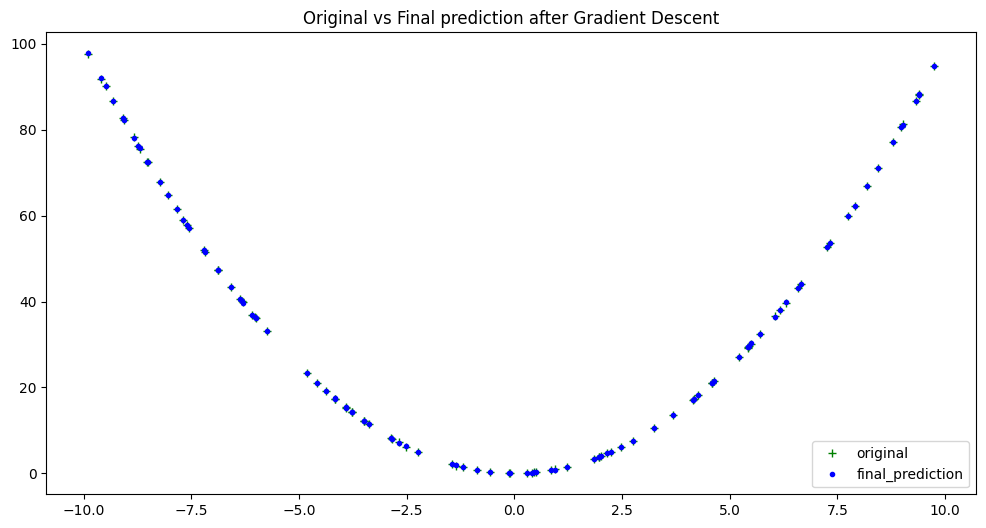

In [15]:
plt.figure(figsize=(12,6))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, GD[2], 'b.', label = 'final_prediction')
plt.title('Original vs Final prediction after Gradient Descent')
plt.legend(loc = "lower right")
plt.show()

This trained model is showing vast improvements after it’s full training cycle. We can examine further by inspecting its final predicted coefficients $a$, $b$ and $c$.

In [16]:
print(f"Final Coefficients predicted: {GD[1]}")
print(f"Original Coefficients: {coeffs}")

Final Coefficients predicted: (np.float64(0.9999579417260247), np.float64(-0.002867610798230069), np.float64(-0.012778521556486263))
Original Coefficients: [1, 0, 0]


Not too far off! A big improvement over the initial random model. Looking at the plot of the loss reduction over training offers further insights.


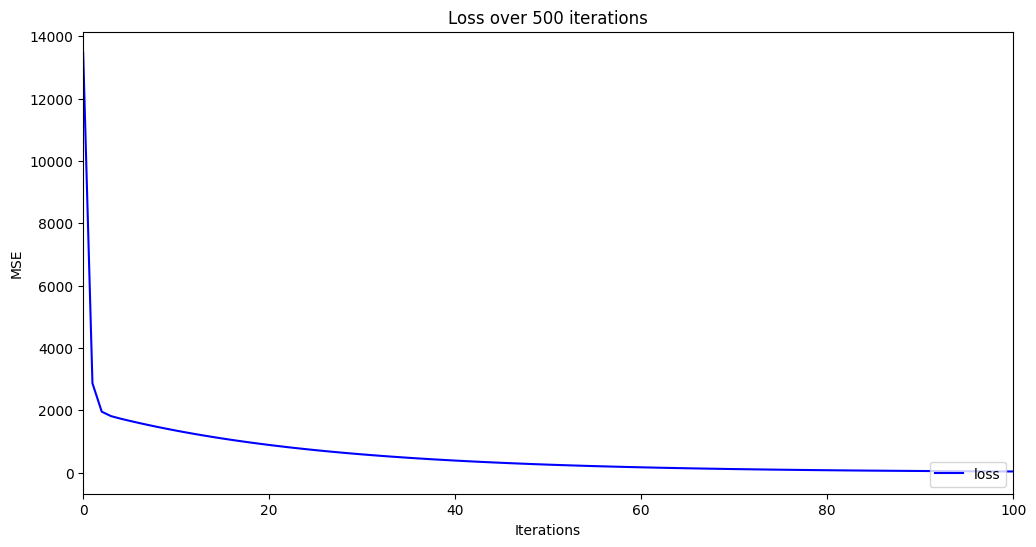

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(GD[3], 'b-', label = 'loss')
# plt.xlim(0,50)
plt.title('Loss over 500 iterations')
plt.legend(loc="lower right")
plt.xlim((0,100))
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()

We observe that the model loss reached close to zero, to give us our more accurate coefficients. We can also see there was no major improvement in loss after about 100 epochs. An alternative strategy would be to add some kind of condition to the training step that stops training when a certain minimum loss threshold has been reached. This would prevent excessive training and potential over-fitting for the model.

# Things to try



1.   Change the coefficients array and try a different polynomial instead of our $x^2$.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
3. Take a degree 5 polynomial with 5 roots and try different initializations, instead of random ones. Does it converge on different values for different initializations? Why does initialization not matter in our case of $x^2$?
4. Can you modify the algorithm to find a maxima of a function, instead of a minima?



**1A**

Iteration 0: x = 4.4
Iteration 1: x = 3.8600000000000003
Iteration 2: x = 3.374
Iteration 3: x = 2.9366
Iteration 4: x = 2.5429399999999998
Iteration 5: x = 2.188646
Iteration 6: x = 1.8697814
Iteration 7: x = 1.58280326
Iteration 8: x = 1.324522934
Iteration 9: x = 1.0920706406
Iteration 10: x = 0.88286357654
Iteration 11: x = 0.694577218886
Iteration 12: x = 0.5251194969974
Iteration 13: x = 0.37260754729766
Iteration 14: x = 0.23534679256789398
Iteration 15: x = 0.11181211331110458
Iteration 16: x = 0.0006309019799941168
Iteration 17: x = -0.0994321882180053
Iteration 18: x = -0.1894889693962048
Iteration 19: x = -0.27054007245658435
Iteration 20: x = -0.34348606521092595
Iteration 21: x = -0.40913745868983337
Iteration 22: x = -0.46822371282085007
Iteration 23: x = -0.521401341538765
Iteration 24: x = -0.5692612073848885
Iteration 25: x = -0.6123350866463997
Iteration 26: x = -0.6511015779817597
Iteration 27: x = -0.6859914201835837
Iteration 28: x = -0.7173922781652253
Iteration 2

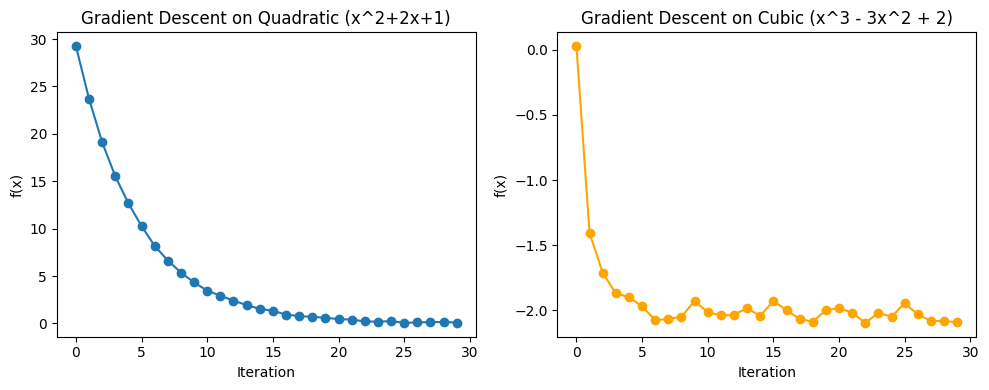

In [32]:
import random
import matplotlib.pyplot as plt

# -------- Polynomial Evaluation with Jitter -------- #
def eval_poly_jitter(coeffs, x, j):
    """
    Evaluate a polynomial with optional jitter.
    coeffs: list of coefficients [a_n, a_(n-1), ..., a_0]
    x: input value
    j: jitter amount
    """
    y = sum(coeffs[i] * (x ** (len(coeffs) - i - 1)) for i in range(len(coeffs)))
    return random.uniform(y - j, y + j)

# -------- Derivative of Polynomial -------- #
def poly_derivative(coeffs):
    """
    Compute derivative coefficients of a polynomial.
    Example: [1, -3, 2] -> x^2 - 3x + 2
             Derivative: [2, -3]
    """
    n = len(coeffs) - 1
    deriv = [coeffs[i] * (n - i) for i in range(n)]
    return deriv

# -------- Gradient Descent Function (with defaults) -------- #
def gradient_descent(coeffs=[1, 2, 1], start_x=5, learning_rate=0.05, iterations=30, j=0.1):
    x = start_x
    deriv_coeffs = poly_derivative(coeffs)
    history = []

    for i in range(iterations):
        grad = sum(deriv_coeffs[k] * (x ** (len(deriv_coeffs) - k - 1)) for k in range(len(deriv_coeffs)))
        x = x - learning_rate * grad
        y = eval_poly_jitter(coeffs, x, j)
        history.append((i, x, y))
        print(f"Iteration {i}: x = {x}") # Add print statement to track x

    return history

# -------- Example Runs -------- #
# Quadratic: f(x) = x^2 + 2x + 1
coeffs_quadratic = [1, 2, 1]

# Cubic: f(x) = x^3 - 3x^2 + 2
coeffs_cubic = [1, -3, 0, 2]

# Run gradient descent (short call works now!)
hist_quad = gradient_descent(coeffs_quadratic)
hist_cubic = gradient_descent(coeffs_cubic)

# -------- Plot Results -------- #
plt.figure(figsize=(10,4))

# Quadratic
plt.subplot(1,2,1)
plt.plot([h[0] for h in hist_quad], [h[2] for h in hist_quad], marker='o')
plt.title("Gradient Descent on Quadratic (x^2+2x+1)")
plt.xlabel("Iteration")
plt.ylabel("f(x)")

# Cubic
plt.subplot(1,2,2)
plt.plot([h[0] for h in hist_cubic], [h[2] for h in hist_cubic], marker='o', color='orange')
plt.title("Gradient Descent on Cubic (x^3 - 3x^2 + 2)")
plt.xlabel("Iteration")
plt.ylabel("f(x)")

plt.tight_layout()
plt.show()

**2A**

In [26]:
GD = gradient_descent(coeffs_quadratic, 30000, 0.005)

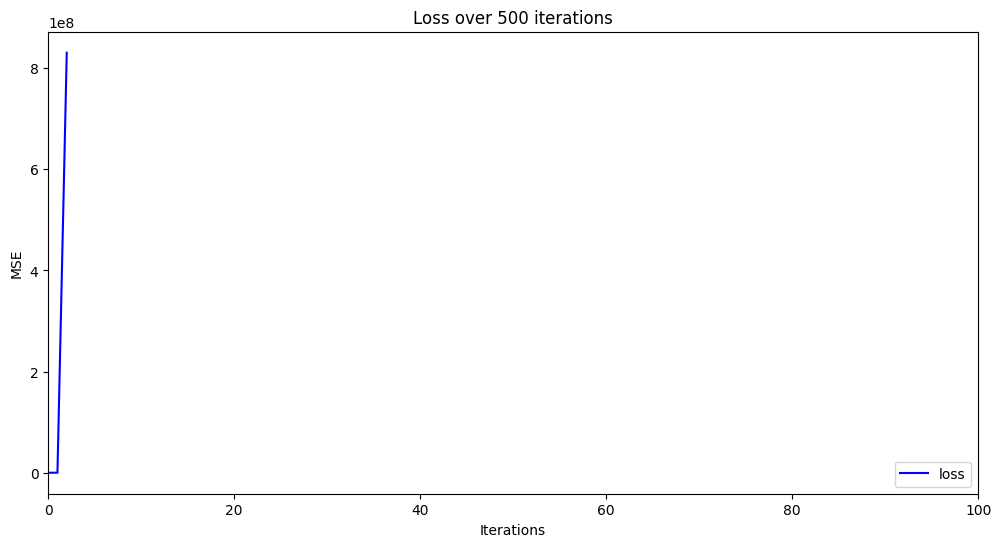

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(GD[3], 'b-', label = 'loss')
# plt.xlim(0,50)
plt.title('Loss over 500 iterations')
plt.legend(loc="lower right")
plt.xlim((0,100))
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()

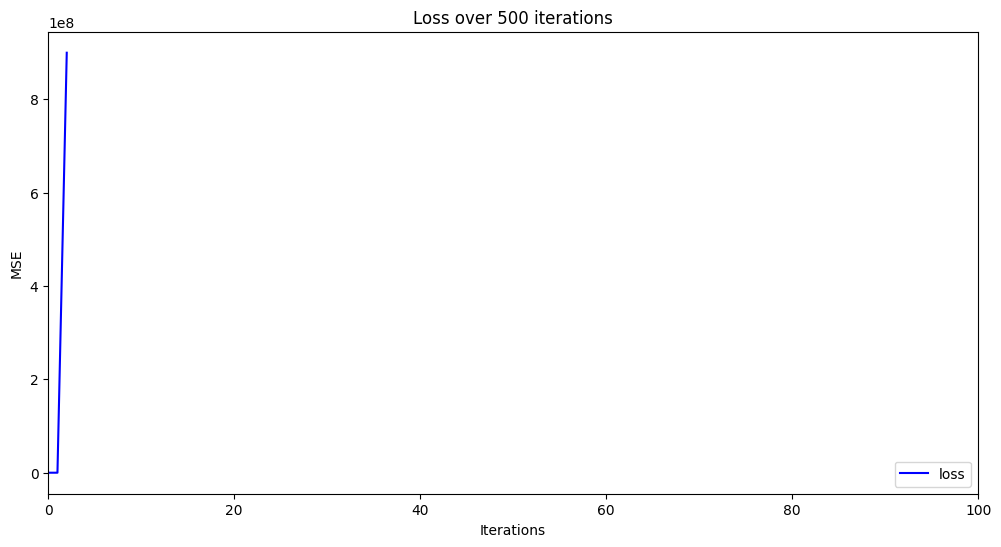

In [28]:
GD = gradient_descent(coeffs_quadratic,30000, 0.00001)


plt.figure(figsize=(12, 6))
plt.plot(GD[3], 'b-', label = 'loss')
# plt.xlim(0,50)
plt.title('Loss over 500 iterations')
plt.legend(loc="lower right")
plt.xlim((0,100))
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()

**3A**

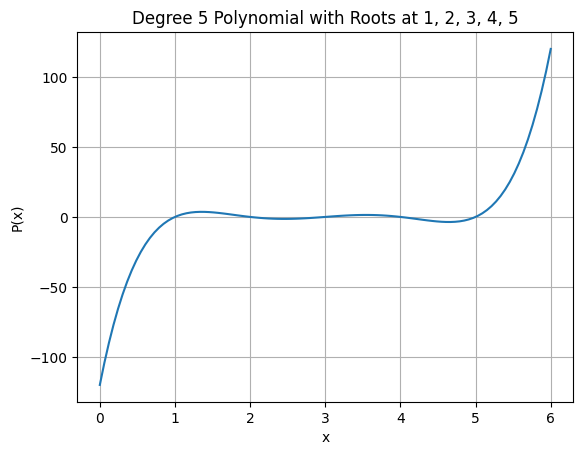

In [34]:
import numpy as np

# Define the roots of the polynomial
roots = [1, 2, 3, 4, 5]

# Function to evaluate the polynomial given the roots
def eval_polynomial(x, roots):
    y = 1
    for r in roots:
        y *= (x - r)
    return y

# Generate some data points
xs = np.linspace(0, 6, 100)  # x values between 0 and 6
ys = [eval_polynomial(x, roots) for x in xs]

# Plot the polynomial
import matplotlib.pyplot as plt
plt.plot(xs, ys)
plt.title("Degree 5 Polynomial with Roots at 1, 2, 3, 4, 5")
plt.xlabel("x")
plt.ylabel("P(x)")
plt.grid(True)
plt.show()


In [35]:
def eval_5th_degree(coeffs, x):
    ##ax^5+bx^4+cx^3+dx^2+ex+f

    a = coeffs[0] * (x*x*x*x*x)
    b = coeffs[1] * (x*x*x*x)
    c = coeffs[2]*(x*x*x)
    d = coeffs[3] * (x * x)
    e = coeffs[4] * (x)
    f=  coeffs[5]
    y = a+b+ c+d+e+f
    return y

hundred_xs = np.random.uniform(-10, 10, 100)
coeffs = [1, 2, 3, 4, 5, 6]

xs = []
ys = []
for x in hundred_xs:
    y  = eval_5th_degree(coeffs, x)
    xs.append(x)
    ys.append(y)

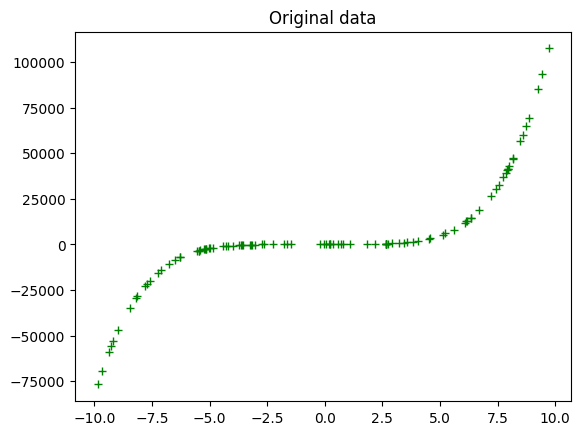

In [36]:
plt.plot(xs, ys, 'g+')
plt.title('Original data')
plt.show()

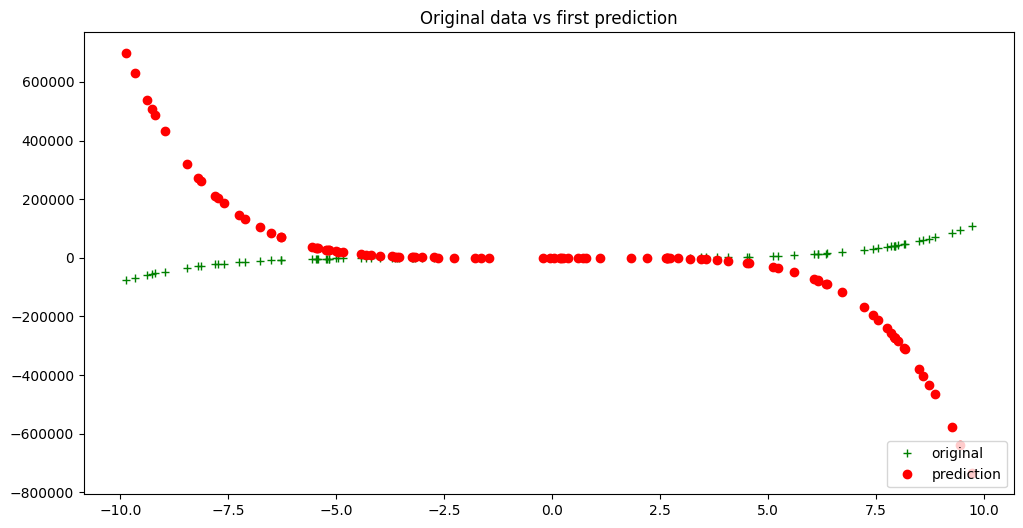

In [37]:
rand_coeffs = [random.randrange(-10, 10) for _ in range(6)]
y_bar = eval_5th_degree(rand_coeffs, hundred_xs)
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, y_bar, 'ro', label = 'prediction')
plt.title('Original data vs first prediction')
plt.legend(loc="lower right")
plt.show()

**4A**

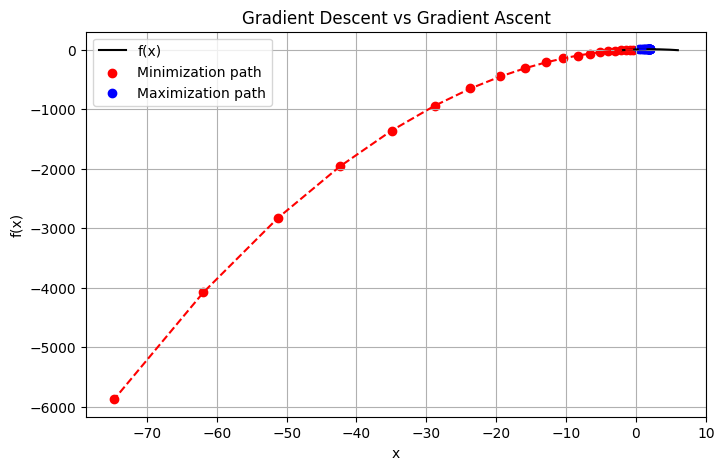

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Polynomial evaluation
def eval_poly(coeffs, x):
    return sum(coeffs[k] * (x ** (len(coeffs) - k - 1)) for k in range(len(coeffs)))

# Derivative coefficients
def poly_derivative(coeffs):
    n = len(coeffs) - 1
    return [coeffs[k] * (n - k) for k in range(len(coeffs) - 1)]

# Gradient Descent / Ascent
def gradient_descent(coeffs, start_x=5, learning_rate=0.05, iterations=30, mode="min"):
    x = start_x
    deriv_coeffs = poly_derivative(coeffs)
    history = []

    for i in range(iterations):
        grad = sum(deriv_coeffs[k] * (x ** (len(deriv_coeffs) - k - 1)) for k in range(len(deriv_coeffs)))

        if mode == "max":
            x = x + learning_rate * grad   # ascent
        else:
            x = x - learning_rate * grad   # descent

        y = eval_poly(coeffs, x)
        history.append((x, y))

    return history

# Example polynomial: f(x) = -x^2 + 4x + 1
coeffs = [-1, 4, 1]

# Run both minimization and maximization
hist_min = gradient_descent(coeffs, start_x=0, learning_rate=0.1, iterations=20, mode="min")
hist_max = gradient_descent(coeffs, start_x=0, learning_rate=0.1, iterations=20, mode="max")

# Convert to arrays for plotting
x_min, y_min = zip(*hist_min)
x_max, y_max = zip(*hist_max)

# Plot the function
X = np.linspace(-2, 6, 200)
Y = [eval_poly(coeffs, xx) for xx in X]

plt.figure(figsize=(8,5))
plt.plot(X, Y, label="f(x)", color="black")

# Plot descent path (minimization)
plt.scatter(x_min, y_min, color="red", label="Minimization path")
plt.plot(x_min, y_min, "--", color="red")

# Plot ascent path (maximization)
plt.scatter(x_max, y_max, color="blue", label="Maximization path")
plt.plot(x_max, y_max, "--", color="blue")

plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gradient Descent vs Gradient Ascent")
plt.legend()
plt.grid(True)
plt.show()


## **Additional Critical Thinking Questions**

1. You are doing full batch gradient descent using the entire training set. Is it necessary to shuffle the training data? Explain your
answer.

2. You would like to train a dog/cat image classifier using mini-batch gradient
descent. You have already split your dataset into train, dev and test sets. The classes
are balanced. You realize that within the training set, the images are ordered in such a
way that all the dog images come first and all the cat images come after. A friend tells
you: ”you absolutely need to shuffle your training set before the training procedure.”
Is your friend right? Explain.

##Answers

**1A)**
Shuffling is not required when using full batch gradient descent. This is because the gradient is computed over the entire dataset in each iteration, so the order of the samples has no effect. Every data point contributes to the gradient simultaneously, and the algorithm will converge to the same minimum regardless of how the data is arranged.

**2A)**
Shuffling is required before using mini-batch gradient descent. Since the data is split into smaller batches, keeping the dataset in a fixed order (e.g., all dog images followed by all cat images) could result in batches that contain only one class. This would produce biased gradient updates and harm learning. Shuffling ensures that each mini-batch has a good mix of samples, making the learning process more stable and effective.